## kdeplot 函数

In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sns.set(style='ticks')

In [3]:
df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


**sns.kdeplot** 函数的常用参数及其说明：

1. data：数据，可以是数组、Series 或 DataFrame。
2. x：指定用于 x 轴的变量（如果数据是 DataFrame）。
3. y：指定用于 y 轴的变量（用于二维 KDE）。
4. shade：布尔值，是否填充 KDE 曲线下方的区域，默认为 False。
5. vertical：布尔值，是否绘制垂直方向的 KDE 曲线，默认为 False。
6. kernel：核函数类型，可以是 gau（默认）、cos、biw、epa、tri、triw。
7. bw：带宽调整参数，默认为 scott。也可以是具体数值。
8. gridsize：绘制 KDE 评估的栅格点数，默认为 100。
9. cut：对 KDE 曲线的延展倍数，默认为 3，即曲线延伸至 3 个带宽之外。
10. clip：用于裁剪 KDE 曲线的元组，指定 (min, max)。
11. legend：布尔值，是否在图例中添加标签，默认为 True。
12. ax：指定绘图的 matplotlib 轴对象，默认为当前轴对象。
13. cumulative：布尔值，是否绘制累积分布函数，默认为 False。
14. multiple：用于多个 KDE 绘制，选项有 layer、stack、fill。默认 layer。
15. common_norm：布尔值，是否对不同 KDE 使用相同的归一化，默认为 True。
16. common_grid：布尔值，是否对不同 KDE 使用相同的评估网格，默认为 True。
17. levels：等高线的数量或等高线的具体值，默认为 10。=
18. thresh：阈值，用于绘制等高线的密度阈值，默认为 0.05。
19. color：指定 KDE 曲线的颜色。
20. palette：指定多 KDE 曲线的颜色调色板。
21. hue：指定分组变量（如果数据是 DataFrame）。
22. fill：布尔值，是否填充 KDE 曲线下方的区域，类似 shade，默认 False。
23. alpha：指定透明度。
24. linewidth：指定曲线的宽度。
25. linestyle：指定曲线的样式。

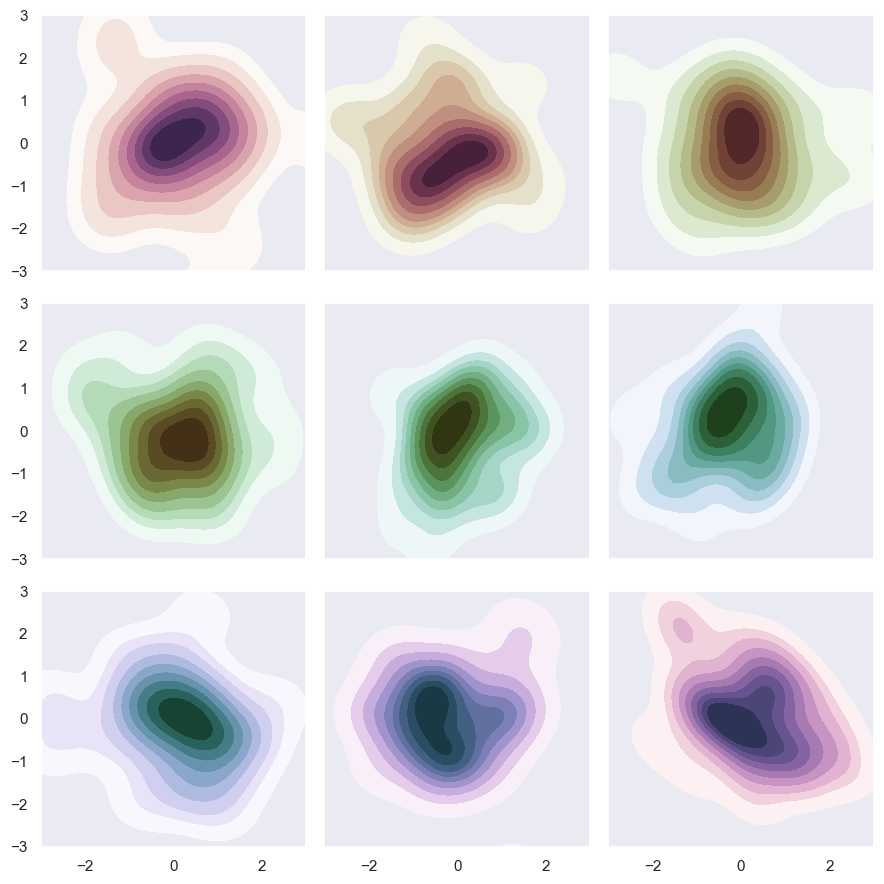

In [28]:
""" 不同的 cubehelix 调色板 """

sns.set(style='dark')  # 设置 Seaborn 的风格为 'dark' 
rs = np.random.RandomState(50)  # 创建一个随机数生成器，种子为 50
f, axes = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)  # 创建一个 3x3 的子图网格，图的总大小为 9x9 英寸, 共享 x，y 坐标


# 为每个子图生成数据并绘制 KDE 图， 使用 np.linspace 生成 10 个在 [0, 3] 范围内均匀分布的数
for ax, s in zip(axes.flat, np.linspace(0, 3, 10)):

    # 生成一个 cubehelix 调色板，起始值为 s，亮度为 1，返回一个 colormap 对象
    cmap = sns.cubehelix_palette(start=s, light=1, as_cmap=True)  

    # 生成两个 50 个随机数的数组，分别作为 x 和 y 坐标
    x, y = rs.randn(2, len(df))

    # 在子图上绘制 KDE 图，使用生成的 colormap，并填充曲线下面的区域，cut 参数设为 5
    sns.kdeplot(
        data=df, 
        x=x, 
        y=y, 
        cmap=cmap, 
        fill=True, 
        cut=5, 
        ax=ax
    )   

    # 设置子图的 x 和 y 轴的范围为 [-3, 3]
    ax.set(xlim=(-3, 3), ylim=(-3, 3))

f.tight_layout()  # 调整子图之间的布局，使其紧密排列
plt.show()

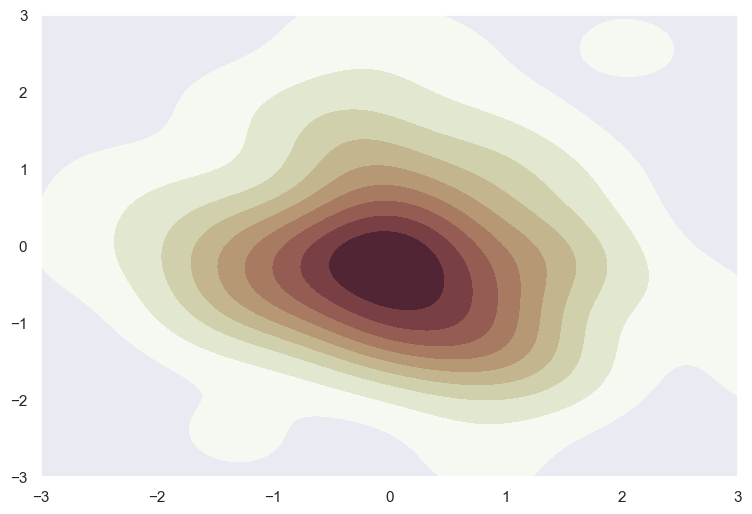

In [34]:
# 设置 Seaborn 的风格为 'dark'
sns.set(style='dark')

# 创建一个随机数生成器，种子为 50
rs = np.random.RandomState(50)

# 创建一个 cubehelix 调色板 (改变示例颜色)，起始值为 0.5，亮度为 1，返回一个 colormap 对象
cmap = sns.cubehelix_palette(start=0.5, light=1, as_cmap=True) 

# 生成两个 100 个随机数的数组，分别作为 x 和 y 坐标
x, y = rs.randn(2, 100)

# 创建一个绘图区域
plt.figure(figsize=(9, 6))

# 在绘图区域上绘制 KDE 图，使用生成的 colormap，并填充曲线下面的区域，cut 参数设为 5
sns.kdeplot(x=x, y=y, cmap=cmap, fill=True, cut=5)

# 设置绘图的 x 和 y 轴的范围为 [-3, 3]
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# 显示绘制的图形
plt.show()

Text(3.8, 4.5, 'setosa')

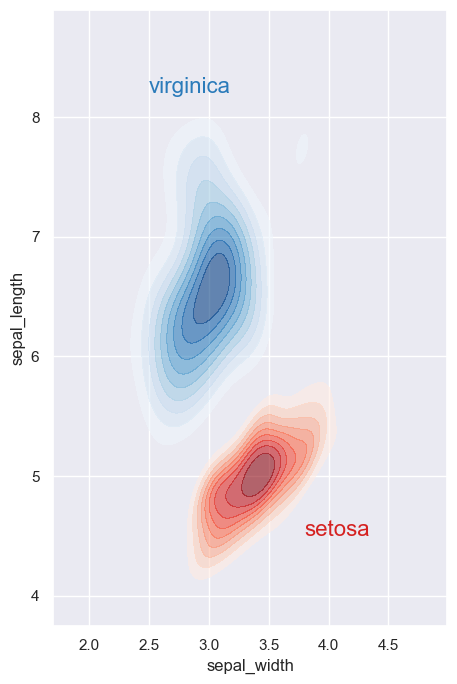

In [60]:
""" 多重双变量KDE图 """

sns.set(style="darkgrid")
iris=sns.load_dataset('iris')

# 按物种分类的子集
setosa = iris[iris.species == 'setosa']
virginica = iris[iris.species == 'virginica']

# configure graph
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# 画两个
ax = sns.kdeplot(x=setosa.sepal_width, y=setosa.sepal_length, cmap='Reds', fill=True, thresh=0.2, alpha=0.6)
ax = sns.kdeplot(x=virginica.sepal_width, y=virginica.sepal_length, cmap='Blues', fill=True, thresh=0.2, alpha=0.6)


# 为图片添加标签
red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(2.5, 8.2, 'virginica', size=16, color=blue)
ax.text(3.8, 4.5, 'setosa', size=16, color=red)